# <span style="color:red">Airbnb: A Boston-Seattle story!</span>


## <span style="color:blue">Business Understanding:</span>
### The goal of this analysis is to answer 3 main questions,

1. How did the price of the Airbnbs change over time?
2. What are the most expensive neighborhoods in Boston and Seattle?
3. What are the most important property features that drive Airbnb prices?

In [1]:
#Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

In [2]:
#Importing the datasets

boston_calendar = pd.read_csv("./boston-airbnb-open-data/calendar.csv")
boston_listing = pd.read_csv("./boston-airbnb-open-data/listings.csv")

seattle_calendar = pd.read_csv("./seattle/calendar.csv")
seattle_listing = pd.read_csv("./seattle/listings.csv")


## <span style="color:blue">Data Understanding</span>


In [3]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## <span style="color:blue">Data Preparation</span>

In [7]:
#Making sure the data is for Seattle and Boston only

print(boston_listing["market"].unique())

print(seattle_listing["market"].unique())


['Boston' 'San Francisco' nan 'Other (Domestic)' 'Other (International)']
['Seattle']


As we can see above, the Seattle dataset only has data for the Seattle market, but Boston market has other markets in its dataset.

In [8]:
#Selecting only the Boston market listings from the Boston dataset

boston_listing = boston_listing[boston_listing["market"] == "Boston"]

In [9]:
#Selecting only the calendar info for the Boston market listings

boston_calendar = boston_calendar[boston_calendar['listing_id'].isin(boston_listing["id"].unique())]

In [10]:
#Adding an additional column in the calendar information
boston_calendar["city"] = "Boston"
seattle_calendar["city"] = "Seattle"

#Making a single dataset for the calendar info
calendar = pd.concat([boston_calendar, seattle_calendar])

#Only selecting the days the listing was available in the calendar dataset
calendar = calendar[calendar["available"] == "t"]

In [11]:
#Cleaning function to clean the price column
def clean(p):
    '''
    Function to clean the price column, eg. '$2,523.42' => 2523.42
    
    input: The value to be cleaned
    
    output: Returns the float value of price
    '''
    if type(p) == str:
        p = p.replace("$", "")
        p = p.replace(",", "")
        return float(p)
    else:
        return p 
    
#Clean the price column using the above function
calendar["price"] = calendar["price"].apply(clean) 

In [12]:
#Splitting the year, month and day from the date column
Date_split = pd.DataFrame(calendar.date.str.split('-',2).tolist(), columns = ['year','month', 'date'])

#Adding the year, month and date back to the calendar dataset
calendar = calendar.reset_index(drop=True)
calendar = pd.concat([calendar, Date_split], axis = 1)

In [13]:
#Checking the shapes of the listing dataset for each city

print(boston_listing.shape)

print(seattle_listing.shape)

(3568, 95)
(3818, 92)


In [14]:
#Identifying the extra columns

extra_columns = []

for n1 in list(boston_listing.columns.values):
    if n1 not in list(seattle_listing.columns.values):
       extra_columns.append(n1)
    
print("Boston extra columns:", extra_columns)

#Dropping the extra columns
boston_listing = boston_listing.drop(columns = extra_columns)

Boston extra columns: ['access', 'interaction', 'house_rules']


In [15]:
#Applying the clean function to the price column

boston_listing["price"] = boston_listing["price"].apply(clean)

seattle_listing["price"] = seattle_listing["price"].apply(clean) 

In [16]:
#Group the neighbourhoods together for each city

boston_listing_neighborhood = boston_listing.groupby(['neighbourhood_cleansed']).mean().sort_values(by = "price", ascending = False)

seattle_listing_neighborhood = seattle_listing.groupby(['neighbourhood_cleansed']).mean().sort_values(by = "price", ascending = False)


In [17]:
#Concatenate both listing datasets to make a single dataset

listing = pd.concat([seattle_listing, boston_listing])

In [18]:
#Checking the percentage of rows that are within (Mean + 2* Std Dev) in price

Limit = listing["price"].mean() + 2*listing["price"].std()

print((listing[listing["price"] <= Limit].shape[0])/listing.shape[0])


0.9680476577308421


In [19]:
#Removing the outliers

listing = listing[listing["price"] <= Limit]

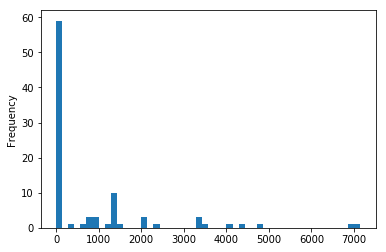

In [20]:
#Checking the proportion of missing data in each column

Missing_Data_Column = listing.isnull().sum(axis = 0)

Missing_Data_Column.plot(kind='hist', bins = 50)

In [21]:
#Removing the columns with more than half of the data missing

Outliers = Missing_Data_Column[Missing_Data_Column > 0.5*listing.shape[0]]

Outliers = Outliers.index.values

Outliers = list(Outliers)

print("Outlier Columns:", Outliers)

listing = listing.drop(columns=Outliers)


Outlier Columns: ['square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'license']


In [22]:
#Removing the column that are unnecessary, duplicate information, non-property related information, or too categorical

listing = listing.drop(columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'amenities',
       'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'jurisdiction_names', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'])

In [23]:
#Dropping the rows where the price is missing

listing = listing.dropna(subset = ["price"])

In [24]:
#Applying the clean function to rest of the columns which deal with money

listing["cleaning_fee"] = listing["cleaning_fee"].apply(clean) 

listing["extra_people"] = listing["extra_people"].apply(clean) 

In [25]:
#One hot encoding the categorical variables

listing = pd.get_dummies(listing, columns = ["neighbourhood_cleansed", "market", "property_type",
                                       "room_type", "bed_type" ,"cancellation_policy"])



In [26]:
#Mapping the binary variables

listing["instant_bookable"] = listing["instant_bookable"].map({'t':1, 'f':0})

In [27]:
#Splitting the data in to input and output

X = listing.drop(columns = ["price"])

y = listing["price"]

In [28]:
#Imputing the missing values in X and scaling the columns in X

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)

X = imp_mean.transform(X)

X_scaler = StandardScaler()

X_scaler.fit(X)

X = X_scaler.transform(X)


In [29]:
#Splitting the data in to train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 21)

## <span style="color:blue">Modelling</span>

In [30]:
#Fitting the data in to a model, and predicting the values for both X_train and X_test

from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_estimators = 200, random_state = 42, min_samples_leaf = 5)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

y_train_pred = reg.predict(X_train)


In [31]:
#Calculating the MSE and R2 score for both the train and test data

from sklearn.metrics import mean_squared_error, r2_score

print("Test Data R2 Score:", r2_score(y_test, y_pred))
print("Test Data MSE:", mean_squared_error(y_test, y_pred))

print("Train Data R2 Score:", r2_score(y_train, y_train_pred))
print("Train Data MSE:", mean_squared_error(y_train, y_train_pred))


Test Data R2 Score: 0.66422631224817
Test Data MSE: 2054.5485460543505
Train Data R2 Score: 0.80298101087749
Train Data MSE: 1170.6901988139646


## <span style="color:blue">Evaluation</span>

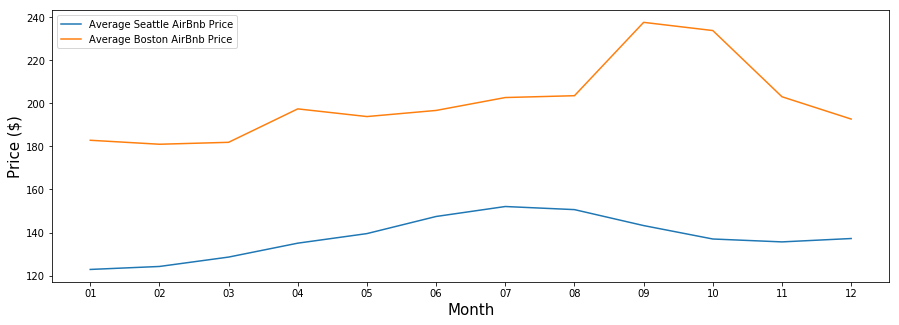

In [32]:
#Plotting the average price for both cities over each month

plt.figure(figsize = (15, 5))
plt.plot(calendar[calendar["city"] == "Seattle"].groupby(['month']).mean()["price"], label = "Average Seattle AirBnb Price")
plt.plot(calendar[calendar["city"] == "Boston"].groupby(['month']).mean()["price"], label = "Average Boston AirBnb Price")
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Price ($)', fontsize = 15)
plt.legend()
plt.show;

<Figure size 1080x360 with 0 Axes>

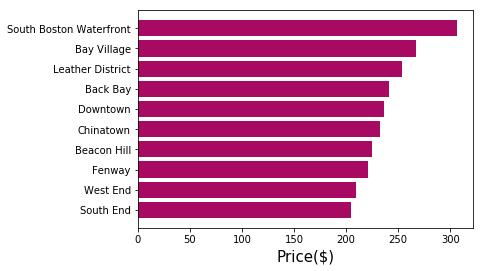

In [33]:
#Plot the 10 most expensive neighborhoods for Boston

y_pos = np.arange(10)
plt.figure(figsize = (15, 5))
fig, ax = plt.subplots()
plt.xlabel('Price($)', fontsize = 15)
ax.barh(y_pos, boston_listing_neighborhood["price"][:10], align='center', color = "#a80a63")
ax.set_yticks(y_pos)
ax.set_yticklabels(boston_listing_neighborhood.index.values)
ax.invert_yaxis()

<Figure size 1080x360 with 0 Axes>

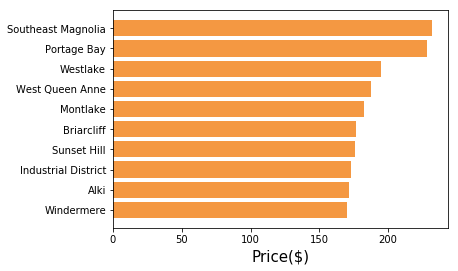

In [34]:
#Plot the 10 most expensive neighborhoods for Seattle

y_pos = np.arange(10)
plt.figure(figsize = (15, 5))
fig, ax = plt.subplots()
plt.xlabel('Price($)', fontsize = 15)
ax.barh(y_pos, seattle_listing_neighborhood["price"][:10], align='center', color = "#f49842");
ax.set_yticks(y_pos)
ax.set_yticklabels(seattle_listing_neighborhood.index.values)
ax.invert_yaxis()

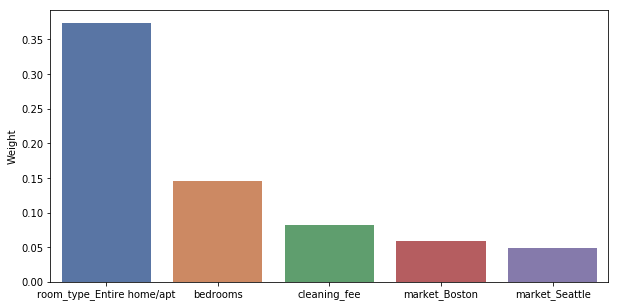

In [35]:
#Plotting the top 5 predective features in the data

importances = reg.feature_importances_

importances = pd.DataFrame(importances, index = listing.drop(columns = ["price"]).columns.values, columns = ["Weight"])

importances = importances.sort_values(by = "Weight", ascending = False)

plt.figure(figsize = (10, 5))

ax = sns.barplot(x = importances.index.values[:5] , y = importances["Weight"][:5], data=importances, palette="deep")



## <span style="color:blue">Results</span>

### Question 1: How did the price of the Airbnbs change over time?

    On average, Boston Airbnbs were $60 more expensive than Seattle in 2016. Seattle's prices were more or less steady throughout the year. Boston had peaks in the fall months of September and October.

### Question 2: What are the most expensive neighborhoods in each city?

    The South Boston Waterfront termed by many as the best area to live in Boston had the most expensive Airbnbs. Bay Village, Leather district, Back Bay and Downtown made the rest of the top five for Boston.
    
    For Seattle, Southeast Magnolia and Portage Bay were the most expensive; Westlake, West Queen Anne, and Montlake followed.
    
    Southeast Magnolia which is the most expensive neighborhood for Seattle was still cheaper on average than the top five expensive neighborhoods in Boston.

### Question 3: What are the most important property features that drive Airbnb prices?

    According to the model, the fact if the listing is for an entire home or apartment is the most important factor in determining the price. The number of bedrooms and the cleaning fee are second and third respectively. Whether the Airbnb is in Boston or Seattle, unsurprisingly, is in the top five factors.